# Classification Metrics Lab

### Introduction

In this lesson, we'll review our various metrics by working with our breast cancer dataset.  Let's get started.

### Loading our Data

We'll begin by loading our data and creating a dataframe to represent our features.

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [4]:
import pandas as pd
X = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

We'll create a series for our targets, but need to reverse the feature and target data, because, confusingly in this dataset 1 represents benign.

In [5]:
cancer['target_names'] # array(['malignant', 'benign'], dtype='<U9')
y = pd.Series((cancer['target'] == 0).astype('int'))

In [6]:
X[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


### Training a Model

Now that we have assigned our data, let's scale our feature data,X, and assign the scaled data to a dataframe.  Assign the dataframe to `X_df`.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_df = pd.DataFrame(X_scaled, columns = cancer['feature_names'])

In [8]:
X_df[:2]

# 	mean radius	mean texture	mean perimeter	mean area	mean smoothness	mean compactness	mean concavity	mean concave points	mean symmetry	mean fractal dimension	...	worst radius	worst texture	worst perimeter	worst area	worst smoothness	worst compactness	worst concavity	worst concave points	worst symmetry	worst fractal dimension
# 0	1.097064	-2.073335	1.269934	0.984375	1.568466	3.283515	2.652874	2.532475	2.217515	2.255747	...	1.886690	-1.359293	2.303601	2.001237	1.307686	2.616665	2.109526	2.296076	2.750622	1.937015
# 1	1.829821	-0.353632	1.685955	1.908708	-0.826962	-0.487072	-0.023846	0.548144	0.001392	-0.868652	...	1.805927	-0.369203	1.535126	1.890489	-0.375612	-0.430444	-0.146749	1.087084	-0.243890	0.281190
# 2 rows × 30 columns

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190


Next, split the data into training, validation, and test sets and apply a stratified split.  Create a 60-20-20 split, and set the `random_state = 1` for each split.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y,
                                                    stratify = y,
                                                    random_state = 1, test_size = .4)
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, 
                                                    test_size = .5, 
                                                    stratify = y_test,
                                                    random_state = 1)

In [11]:
X_train.shape, X_validate.shape, X_test.shape

((341, 30), (114, 30), (114, 30))

Now let's train a logistic regression model and score the accuracy on the validation set.

In [42]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train).score(X_validate, y_validate)

# 0.9736842105263158

0.9736842105263158

Train a second logistic regression model with a `class_weight` of `balanced`.  Score the model on the validation set.

In [41]:
from sklearn.linear_model import LogisticRegression

balanced_lr = LogisticRegression()
balanced_lr.fit(X_train, y_train).score(X_validate, y_validate)
# 0.9736842105263158

0.9736842105263158

Now let's compare the `f1_score` of our two models.  First use sklearn to calculate the `f1_score` of the model with the original sample weight.

In [43]:
# score sample model 

from sklearn.metrics import f1_score

f1_score(y_validate, lr_model.predict(X_validate))

# 0.963855421686747

0.963855421686747

In [44]:
# score balanced model 

from sklearn.metrics import f1_score

f1_score(y_validate, balanced_lr.predict(X_validate))

# 0.963855421686747

0.963855421686747

Remember that `f_1_score` is a harmonic mean of the precision and recall.  

Now let's see how the two models perform on the auc_score, which remember calculates how our models order the data.

In [20]:
# calculate roc of model with original sample weights

from sklearn.metrics import roc_auc_score

 

sample_roc_auc = roc_auc_score(y_validate, model.predict(X_validate))
sample_roc_auc

# 0.9692460317460317

0.9692460317460317

In [22]:
# calculate balanced model 

balanced_roc_auc = roc_auc_score(y_validate, balanced_model.predict(X_validate))
balanced_roc_auc

# 0.9692460317460317

0.9692460317460317

We see that both models perform the same.

### Try Under-Sampling

> We'll code this section for you, as it's a new technique.

Now let's try a different technique.  So far we have trained a model to handle imbalanced data by weighing the samples from the under-represented class more highly.  A different technique is simply to reduce the over-represented, that is undersample our dataset.  Let's try this.

We'll begin by assigning our X and y training data into the same dataframe.

In [23]:
combined_X_y = X_train.assign(y = y)

Then we'll shuffle our data.

In [24]:
combined_sample = combined_X_y.sample(frac=1, random_state = 5)

And we'll select just the positive samples from our training data.

In [25]:
cancerous_combined = combined_sample[combined_sample['y'] == 1]
cancerous_combined.shape

# (127, 31)

(127, 31)

Then select the benign observations, but limit them to the same number of observations as our cancerous data.

In [26]:
benign_combined = combined_sample[combined_sample['y'] == 0][:127]
benign_combined.shape

(127, 31)

Now combine the two datasets together.

In [27]:
even_df = pd.concat([cancerous_combined, benign_combined])

And let's check that we have an equal number of positive and negative samples.

In [28]:
even_df.y.mean()

0.5

Finally, we can shuffle our data so that we do not have all positive samples followed by all negative samples.

In [29]:
shuffled_even_df = even_df.sample(frac=1, random_state=42)

Now we retrain our model.

In [30]:
model = LogisticRegression()
X_even = shuffled_even_df.drop('y', axis = 1)
y_even = shuffled_even_df['y']
model.fit(X_even, y_even).score(X_validate, y_validate)

# 0.9473684210526315

0.9473684210526315

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(model.predict(X_validate), y_validate)
# 0.9402597402597402

0.9402597402597402

> So we see a slight decrease to balancing our data (0.9692460317460317 was our previous high score).

### Random Forest Classifier

Now let's see how a random forest classifier performs on our datasets.  First, let's try it on our original training dataset.

> Set the number of estimators to 50, `min_samples_leaf` as `7`, `max_features = 'log2'`and `class_weight = 'balanced'.`

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced', max_features='log2',
                        min_samples_leaf=7, n_estimators=50, random_state=1)

rfc.fit(X_train, y_train)
# RandomForestClassifier(class_weight='balanced', max_features='log2',
#                        min_samples_leaf=7, n_estimators=50, random_state=1)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       min_samples_leaf=7, n_estimators=50, random_state=1)

Calculate the `roc_auc_score` using sklearn.

In [35]:
roc_auc_score(rfc.predict(X_validate), y_validate)

# 0.9217532467532468

0.9217532467532468

> Ok, so not quite as good as our logistic regression model.

Let's see how a model trained on our balanced dataset performs.  Use the same hyperparameters, but do not set `class_weight = 'balanced'`.

In [36]:
rfc_balanced = RandomForestClassifier(max_features='log2', min_samples_leaf=7, n_estimators=50,
                        random_state=1)
rfc_balanced.fit(X_train, y_train)
# RandomForestClassifier(max_features='log2', min_samples_leaf=7, n_estimators=50,
#                        random_state=1)

RandomForestClassifier(max_features='log2', min_samples_leaf=7, n_estimators=50,
                       random_state=1)

> Check the `roc_auc_score`.

In [38]:
roc_auc_score(rfc_balanced.predict(X_validate), y_validate)
# 0.9479729729729729

0.9479729729729729

So still not as good as our logistic regression models with a score of .96.

### Choosing a Threshold

Now we want to lean towards catching cancer cases, as opposed to worrying about false negatives.  Let's plot our precision recall curves of the non-balanced logistic regression model to get a sense of a threshold.  Use the validation data to find the threshold.

In [200]:
X_train.shape, X_validate.shape

((341, 30), (114, 30))

In [47]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_validate, lr_model.predict_proba(X_validate)[:, 1])

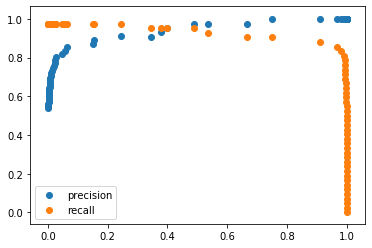

In [48]:
# plot curve here


import matplotlib.pyplot as plt

plt.scatter(x = thresholds, y = precision[1:], label = 'precision')
plt.scatter(x = thresholds, y = recall[1:], label = 'recall')
plt.legend()

<img src="./precision-recall-metrics.png" width="40%">

We can see from the plot above that we can achieve a high level of recall, without a hardly any drop to precision.  Of course we don't want to just to classify everything as cancerous.  That wouldn't be so helpful.  

Let's experiment with a threshold of .2 to see how we perform.

> After setting a threshold, check the precision score.

In [97]:
from sklearn.metrics import precision_score, recall_score

threshold = .2
precision_score(y_validate, lr_model.predict_proba(X_validate)[:, 1] > threshold)

# 0.8913043478260869

0.8913043478260869

> Then check the recall score.

In [98]:

recall_with_threshold = recall_score(y_validate, lr_model.predict_proba(X_validate)[:, 1] > threshold)
recall_with_threshold

# 0.9761904761904762

0.9761904761904762

We see that if we set a threshold at .12, we can capture almost all of the positive cases, and still maintain a precision score of .91.  Let's do that.

### Combining our Data

Let's combine our training and validation data, so we can our logistic regression model.

In [61]:

X_combined = pd.concat([X_train, X_validate])
y_combined = pd.concat([y_train, y_validate]) 
lr_combined = LogisticRegression().fit(X_combined, y_combined)

And let's practice *undersampling* our data with this new dataset.  We'll combine our features and targets into one dataframe.

In [62]:
X_y_combined = X_combined.assign(y = y_combined)
X_y_combined[:2]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
545,-0.144078,0.916946,-0.196849,-0.232332,-0.277565,-0.698760,-0.741488,-0.631673,-0.538947,-0.678694,...,0.555750,-0.288363,-0.265064,-0.472051,-0.652457,-0.802570,-0.652707,-0.418610,-0.798864,0
121,1.287353,-0.504892,1.212267,1.200527,0.643316,0.107247,0.714386,0.973229,0.563638,-0.094641,...,-0.126566,1.135996,1.175019,0.786039,-0.160085,0.263919,0.803870,-0.010929,0.034035,1


Then separate out the observations with a positive target value, and negative target value accordingly.

In [63]:
X_y_positive = X_y_combined[X_y_combined['y'] == 1]
X_y_negative = X_y_combined[X_y_combined['y'] == 0]

In [64]:
X_y_positive.shape, X_y_negative.shape

# ((169, 31), (286, 31))

((169, 31), (286, 31))

So we can see that to get them even, we should shuffle our negative data and select the first 169 samples.

> Set the random_state = 1.

In [65]:
shuffled_X_y_neg = X_y_negative.sample(frac = 1, random_state = 1)[:169]

Then combine this with the dataframe of positive values.

In [70]:
X_y_combined_even = pd.concat([X_y_positive, shuffled_X_y_neg])
X_y_combined_even['y'].mean()

# 0.5

0.5

And shuffle the data so that we do not have all of the positive data first.

> Set random_state = 1.

In [71]:
X_y_combined_even_shuffled = X_y_combined_even.sample(frac = 1, random_state = 1)

Now let's train a model another logistic regression model with our undersampled data.  

In [72]:
X_undersampled =  X_y_combined_even_shuffled.drop('y', axis = 1)
y_undersampled = X_y_combined_even_shuffled['y']
lrm_combined_undersampled = LogisticRegression().fit(X_undersampled, y_undersampled)



In [76]:
roc_auc_score(y_test, lrm_combined_undersampled.predict_proba(X_test)[:, 1])

# 0.9931215198165738

0.9931215198165738

Now, let's keep the same threshold of .2, and make predictions on the test data.

In [99]:
undersampled_predictions = lrm_combined_undersampled.predict_proba(X_test)[:, 1] > .2

precision_test = precision_score(y_test, undersampled_predictions)
precision_test

# 0.8913043478260869

0.8913043478260869

In [101]:
recall_test = recall_score(y_test, undersampled_predictions)
recall_test

# 0.9534883720930233

0.9534883720930233

So we see that with the same threshold our precision decreases slightly on the test set, but we can capture 95 percent of positive cases.

### Resources 
[Using Machine Learning Metrics](https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/)

[Smote](https://rikunert.com/SMOTE_explained)